Modify geolocation in an existing l1b file

In [1]:
from netCDF4 import Dataset
import subprocess
from copy import deepcopy
import numpy as np

path_l1b      = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level1b/'
filename      = 'Tango_Carbon_l1b_exp1.0.nc'
filename_per  = 'Tango_Carbon_l1b_exp1.0_geoper.nc'

# cp l1b reference data to a perturbed file
cmd_str= 'cp '+filename +' '+filename_per
subprocess.run(cmd_str, shell=True, cwd=path_l1b)

data = Dataset(path_l1b + filename_per, 'r+')
lat = deepcopy(data['geolocation_data']['latitude'][:])
lon = deepcopy(data['geolocation_data']['longitude'][:])

# random plus systematic error
np.random.seed(10)
nlat = lat.shape
nlon = lon.shape
lat_shift = 0.0001
lon_shift = -0.0001
lat_per = np.random.normal(1., 1.E-5, nlat)*lat + lat_shift
lon_per = np.random.normal(1., 1.E-5, nlon)*lon + lon_shift

data['geolocation_data']['latitude'][:] = lat_per
data['geolocation_data']['longitude'][:] = lon_per
data.close()


call pam routine

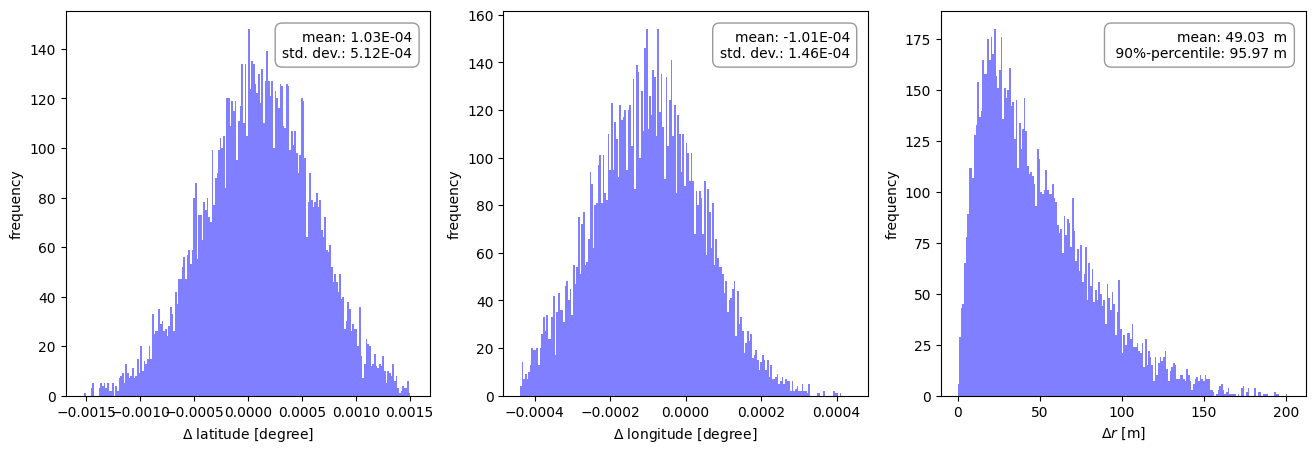

In [4]:
from teds.pam import pam_co2

filen1 = path_l1b + filename
filen2 = path_l1b + filename_per
percentile = 90
pam_co2.pam_l1b_geo(filen1, filen2, percentile)